## 1. Install Dependencies and Setup (Python 3.10.11)

In [1]:
!pip install --default-timeout=1000 tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python==4.9.0.80 matplotlib==3.8.4

  Using cached tensorflow-2.8.0-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached tensorflow_gpu-2.8.0-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.8.4-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.w

In [2]:
!pip install protobuf==3.20.0

  Using cached protobuf-3.20.0-cp310-cp310-win_amd64.whl.metadata (698 bytes)
Using cached protobuf-3.20.0-cp310-cp310-win_amd64.whl (903 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.1
    Uninstalling protobuf-5.26.1:
      Successfully uninstalled protobuf-5.26.1


In [1]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.63.0
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.4
ipython                      8.24.0
jedi                         


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2. Remove Dodgy Images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
data_dir = "data"

In [9]:
os.listdir(os.path.join(data_dir, "happy"))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Supremely-Happy-People-2.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principle

In [10]:
image_exts = ["jpeg", "jpg", "png"]

In [11]:
image_exts

['jpeg', 'jpg', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

happy
05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Supremely-Happy-People-2.jpg
11-Habits-of-Truly-Happy-People.jpg
13ryLrJDyVF05wXDYYUXcJQ.jpeg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
227-2271622_happy-people-business-team-celebrating-png.png
35438_hd.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg
56f455011e0000b300705475.jpeg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
7Y57w0983emdERAoQylUHI

In [13]:
img = cv2.imread(os.path.join("data", "happy", "_happy_jumping_on_beach-40815.jpg"))

In [14]:
img.shape

(213, 320, 3)

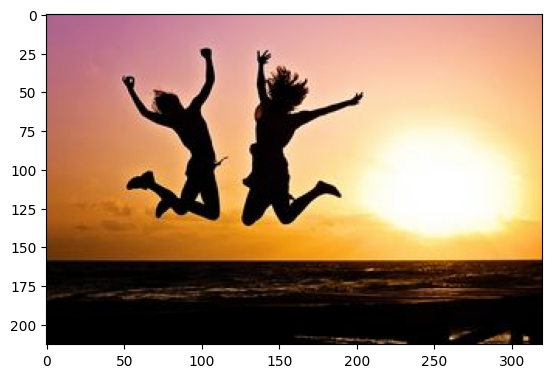

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)

        except Exception as e:
            print("Issue with image {}".format(image_path))

## 3. Load Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export('keras.utils.image_dataset_from_directory',
              'keras.preprocessing.image_dataset_from_directory',
              v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
               

In [19]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 295 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
batch[0].shape

(32, 256, 256, 3)

In [23]:
batch[1]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

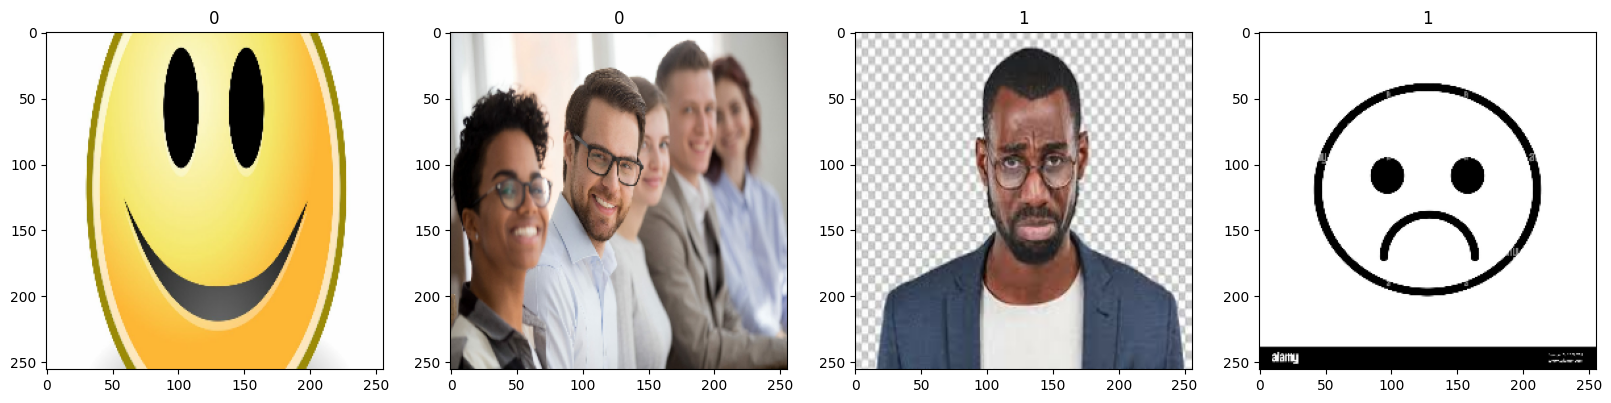

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [25]:
data = data.map(lambda x, y: (x / 255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

In [28]:
batch[0].max()

1.0

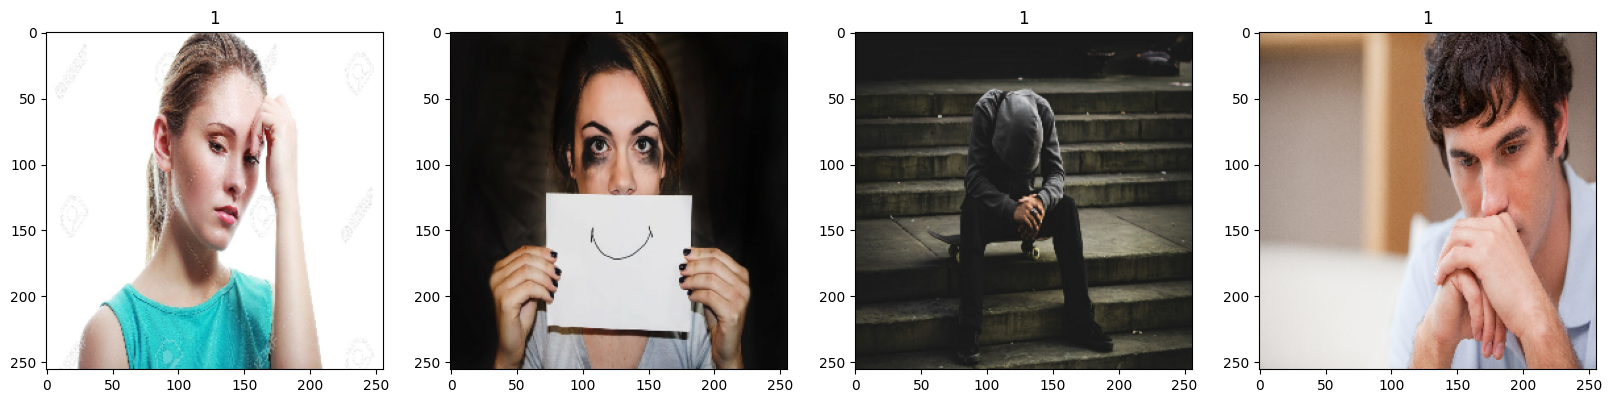

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 5. Split Data

In [30]:
len(data)

10

In [31]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [32]:
train_size + val_size + test_size

10

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 6. Build Deep Learning Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [37]:
for images, _ in train.take(1):
    model(images)

In [38]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 7. Train

In [40]:
logdir = "logs"

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 4s 220ms/step - loss: 0.7167 - accuracy: 0.5848 - val_loss: 0.6467 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 2s 217ms/step - loss: 0.6315 - accuracy: 0.5268 - val_loss: 0.5833 - val_accuracy: 0.5938
Epoch 3/20
7/7 [==============================] - 2s 211ms/step - loss: 0.5506 - accuracy: 0.6964 - val_loss: 0.4780 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 2s 209ms/step - loss: 0.4701 - accuracy: 0.8125 - val_loss: 0.4491 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 2s 209ms/step - loss: 0.3462 - accuracy: 0.8705 - val_loss: 0.4685 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 2s 213ms/step - loss: 0.3205 - accuracy: 0.8393 - val_loss: 0.3121 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 2s 235ms/step - loss: 0.2160 - accuracy: 0.9241 - val_loss: 0.1373 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====

In [43]:
hist.history

{'loss': [0.7167291641235352,
  0.6314965486526489,
  0.5505967736244202,
  0.4700646996498108,
  0.34618276357650757,
  0.32048240303993225,
  0.2160176932811737,
  0.18700329959392548,
  0.11443132907152176,
  0.12837448716163635,
  0.10861152410507202,
  0.09956570714712143,
  0.11703777313232422,
  0.09559541195631027,
  0.08032985031604767,
  0.039913348853588104,
  0.022683585062623024,
  0.013446884229779243,
  0.009344646707177162,
  0.005609177518635988],
 'accuracy': [0.5848214030265808,
  0.5267857313156128,
  0.6964285969734192,
  0.8125,
  0.8705357313156128,
  0.8392857313156128,
  0.9241071343421936,
  0.9375,
  0.9776785969734192,
  0.9553571343421936,
  0.9553571343421936,
  0.96875,
  0.9598214030265808,
  0.9732142686843872,
  0.9642857313156128,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6467301845550537,
  0.5832781791687012,
  0.47797054052352905,
  0.4491124451160431,
  0.46853041648864746,
  0.3120545744895935,
  0.13729098439216614,
  0.192469298839569

## 8. Plot Performance

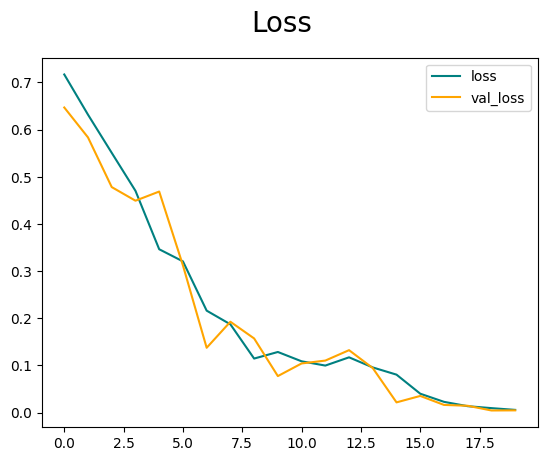

In [44]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

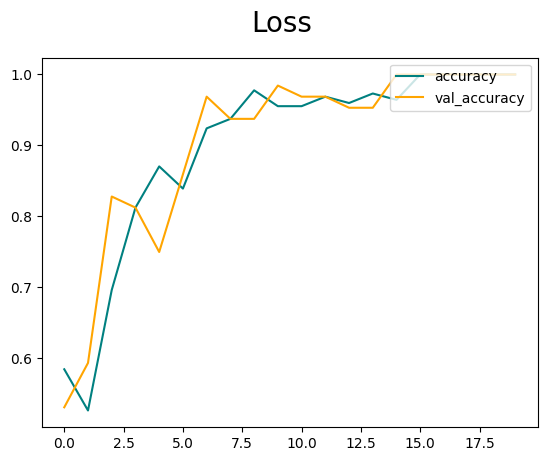

In [45]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

## 9. Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [49]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0, Accuracy:1.0


## 10. Test

In [50]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

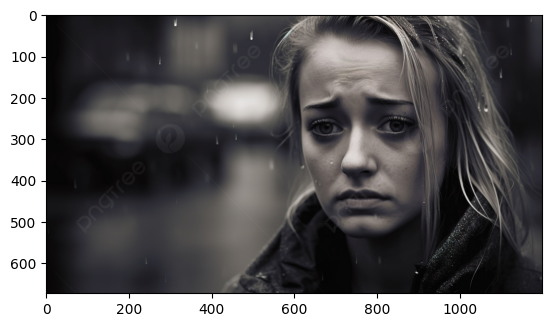

In [51]:
img = cv2.imread("pngtree-woman-looking-sad-in-the-rain-picture-image_2771069.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

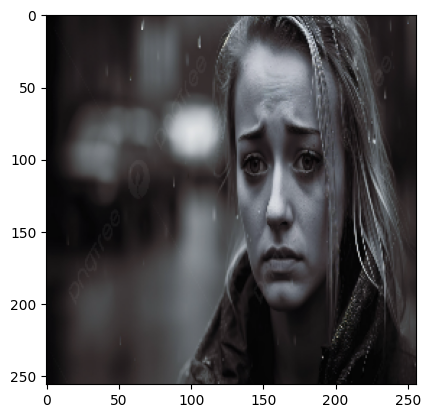

In [52]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
resize.shape

TensorShape([256, 256, 3])

In [54]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [55]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

In [56]:
yhat

array([[0.9994481]], dtype=float32)

In [57]:
if yhat > 0.5:
    print(f"Predicted class is SAD")
else:
    print(f"Predicted class is HAPPY")

Predicted class is SAD


## 11. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join("models", "HappSadImageClassification.h5"))

In [60]:
new_model = load_model(os.path.join("models", "HappSadImageClassification.h5"))

In [61]:
yhat_new = new_model.predict(np.expand_dims(resize / 255, 0))

In [62]:
if yhat_new > 0.5:
    print(f"Predicted class is SAD")
else:
    print(f"Predicted class is HAPPY")

Predicted class is SAD
